# # Predicting Diabetes


# Import Libraries

In [2]:
import pandas as pd    #pandas is dataframe library
import matplotlib.pyplot as plt  #plots data
import numpy as np     #numpy provides N dim object support

%matplotlib inline

# Load and review data

In [3]:
df = pd.read_csv("pima-data.csv")

In [4]:
df.shape

(768, 10)

In [5]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


Check for null values

In [7]:
df.isnull().values.any()

False

Ploting the graph

In [8]:
def plot_corr(df,size =11):
    """
    Function plots a graphical corrrelation matrix for each pair of column in the dataframe.
    
    Input:
        df:pandas DataFrame
        size:verticle and horizontal size of the plot
        
    Displays:
        matrix of correlation between column. Blue-cyan-yellow-red-darkred =>less to more correlated
                                              0 ---------------------> 1
                                              Expect a darkred line running from top left to bottom right
    """
    corr = df.corr() #data from corelation function
    fig,ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)  #color code for the rectangle by corelation values
    plt.xticks(range(len(corr.columns)),corr.columns) #draw x ticks marks
    plt.yticks(range(len(corr.columns)),corr.columns) #draw y ticks marks

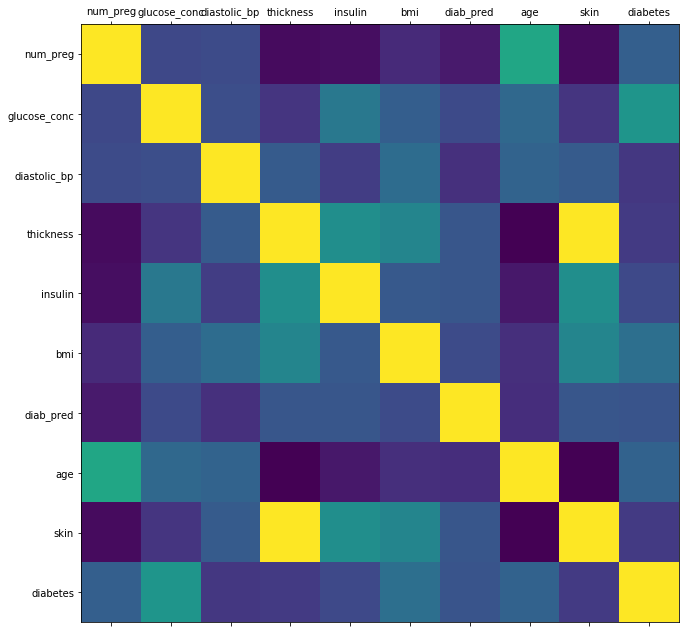

In [9]:
plot_corr(df)

In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [11]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [12]:
del df['skin']

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


# # Molding the data

Check data types

In [14]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [15]:
diabetes_map = {True:1,False:0}

In [16]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [17]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now we are going to use this data to train the algorithms

In [19]:
num_true= len(df.loc[df['diabetes']==True])
num_false= len(df.loc[df['diabetes']==False])
print(num_true)
print(num_false)
total = (num_true + num_false)*1.00
print total
per_true = 100*(num_true / total)
per_false = 100*(num_false / total)
print per_true
print per_false

268
500
768.0
34.8958333333
65.1041666667


# #Splitting the data 70% for training , 30 % for testing

In [20]:
#!/usr/bin/env python

In [21]:
from sklearn.cross_validation import train_test_split

/home/sachinbose/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
#!/usr/bin/env python

In [23]:
from sklearn.cross_validation import train_test_split

In [24]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred',
                    'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = split_test_size , random_state = 42)

In [25]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
from sklearn.preprocessing import Imputer
# impute with mean all 0 reading
fill_0 = Imputer(missing_values=0, strategy = "mean" , axis =0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

# Training Initial Algorithms - Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

#create Gaussian Naive Bayes model object and train it with the data 
nb_model = GaussianNB()

nb_model.fit(X_train,y_train.ravel())

GaussianNB(priors=None)

Performance on Training data

In [28]:
#predict values using the training data

nb_predict_train = nb_model.predict(X_train)

#import the performance matrix library
from sklearn import metrics

#Accuracy 
print ("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))

Accuracy : 0.7542


In [29]:
#predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

#traning metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test , nb_predict_test)))

Accuracy: 0.7359


In [30]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Metrics

In [31]:
print("Confusion Matrix")
#Note the use of labels for set 1 = True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test , labels = [1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,nb_predict_test , labels = [1,0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



# Using Random Forest algorith 

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)  #Create random forest object
rf_model.fit(X_train , y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# Predicting Training Data

In [33]:
rf_predict_train = rf_model.predict(X_train)
#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train ,rf_predict_train)))

Accuracy: 0.9870


# Predict Test Data

In [34]:
rf_predict_test = rf_model.predict(X_test)

#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test , rf_predict_test)))

Accuracy: 0.7100


# Metrix

In [35]:
print("Confusion Matrix")
#Note the use of labels for set 1 = True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test , labels = [1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,nb_predict_test , labels = [1,0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = 0.7 , random_state =42)
lr_model.fit(X_train , y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

In [37]:
#training metrics
print("Accuracy :{0:.4f}".format(metrics.accuracy_score(y_test , lr_predict_test)))
print(metrics.confusion_matrix(y_test , lr_predict_test , labels = [1,0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test , lr_predict_test , labels = [1,0]))

Accuracy :0.7446
[[ 44  36]
 [ 23 128]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



# Setting regularization parameter


1st max value of 0.738 occured at C = 0.300


Text(0,0.5,u'recall score')

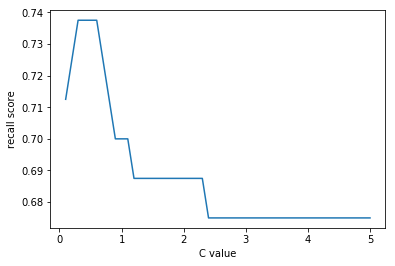

In [38]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values , recall_scores = [] ,[]

C_val = C_start
best_recall_score = 0
while (C_val < C_end) :
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, class_weight = "balanced" ,random_state = 42)
    lr_model_loop.fit(X_train , y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test , lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C = {1:.3f}".format(best_recall_score ,best_score_C_val ))

%matplotlib inline
plt.plot(C_values , recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [39]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight = "balanced",C = best_score_C_val , random_state =42)
lr_model.fit(X_train , y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

#training metrics
print("Accuracy :{0:.4f}".format(metrics.accuracy_score(y_test , lr_predict_test)))
print(metrics.confusion_matrix(y_test , lr_predict_test , labels = [1,0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test , lr_predict_test , labels = [1,0]))

Accuracy :0.7143
[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231



# LogisticRegressionCV

In [41]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs = -1 , random_state = 42 , Cs = 3 , cv = 10 , refit =  True , class_weight = "balanced")
lr_cv_model.fit(X_train , y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [42]:
lr_cv_predict_test = lr_cv_model.predict(X_test)
#training metrics
print("Accuracy :{0:.4f}".format(metrics.accuracy_score(y_test , lr_predict_test)))
print(metrics.confusion_matrix(y_test , lr_predict_test , labels = [1,0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test , lr_predict_test , labels = [1,0]))

Accuracy :0.7143
[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231

